## Análisis de datos de Encuesta Mundial de Salud Escolar

### Grupo 9
Integrantes:
- Cruz, Ruth
- Gabis Leccesi, Luciana
- Garnica, Rocío
- Gonzalez Navarro, Sol
- Palma, Malena Agustina
- Vidal, Ana
- Stachoni, Yanina

**Dataset seleccionado:** 
- Resultados encuesta EMSE
- Origen de datos: https://datos.gob.ar/ar/dataset/salud-base-datos-3deg-encuesta-mundial-salud-escolar-emse-con-resultados-nacionales-argentina

La Encuesta Mundial de Salud Escolar (EMSE) utiliza una metodología estandarizada a nivel mundial para relevar datos sobre aspectos sociodemográficos e indaga sobre conductas relacionadas con el comportamiento alimentario, el consumo de alcohol y otras drogas, la violencia y daños no intencionados, la seguridad vial, la salud mental, el con- sumo de tabaco, la actividad física, los comportamientos sexuales y los factores de protección

**Objetivos:**
* La EMSE abarca muchas temáticas con más de 70 preguntas. Para nuestro estudio decidimos enforcarnos en temas de violencia y daños no intencionados, persiguiendo los siguientes objetivos:
* * Detectar patrones en niños y niñas que han sido víctimas de intimidación, considerando relaciones familiares y con amigos, datos físicos y sociodemográficos.
  * Detectar diferencias en los distintos tipos de intimidación (en escuela, fuera del ámbito escolar, vía internet).
  * Predecir victimas de intimidación.
 



In [1]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

-------------
Para poder centrarnos en el análisis de los datos que nos resultan relevantes, primero analizamos todas las preguntas y seleccionamos aquellas con las que vamos a trabajar, pudiendo ampliar el análisis luego.

In [2]:
#Leemos Excel creado con el analisis de las preguntas que son de interes
df_conf = pd.read_excel("Analisis Preguntas.xlsx")
print(f"Filas y columnas totales: {df_conf.shape}")
df_conf.head()

Filas y columnas totales: (75, 4)


,Id Pregunta,Pregunta,Relevante,Nombre Columna
0,texto_q1,Edad,Si,edad
1,texto_q2,Sexo,Si,sexo
2,texto_q3,Grado o Año,Si,grado
3,q4,Estatura,Si,altura
4,q5,Peso,Si,peso


In [3]:
#Armamos configuracion de columnas a cargar del dataset
df_conf = df_conf[df_conf["Relevante"] == "Si"]
print(f"Cantidad de preguntas de interés para el análisis: {df_conf.shape[0]}")
columnas_a_leer = df_conf["Id Pregunta"].values
print(f"Columnas a leer: {columnas_a_leer}")
columnas_nombres = df_conf["Nombre Columna"].values
print(f"Título de las columnas: {columnas_nombres}")

Cantidad de preguntas de interés para el análisis: 43
Columnas a leer: ['texto_q1' 'texto_q2' 'texto_q3' 'q4' 'q5' 'texto_q6' 'texto_q16'
 'texto_q17' 'texto_q18' 'texto_q19' 'texto_q22' 'texto_q23' 'texto_q24'
 'texto_q26' 'texto_q27' 'texto_q28' 'texto_q29' 'texto_q33' 'texto_q34'
 'texto_q35' 'texto_q39' 'texto_q40' 'texto_q44' 'texto_q45' 'texto_q49'
 'texto_q51' 'texto_q53' 'texto_q54' 'texto_q55' 'texto_q56' 'texto_q57'
 'texto_q58' 'texto_q59' 'texto_q60' 'texto_q66' 'texto_q67' 'texto_q68'
 'texto_q76' 'texto_q80' 'texto_q81' 'texto_qnunwtg' 'texto_qnowtg'
 'texto_qnobeseg']
Título de las columnas: ['edad' 'sexo' 'grado' 'altura' 'peso' 'hambre' 'participar_pelea'
 'cantidad_lesiones' 'tipo_lesion' 'causa_lesion' 'sentir_soledad'
 'sentir_preocupacion' 'pensar_suicidio' 'intentar_suicidio'
 'amigos_cercanos' 'edad_cigarrillo' 'dias_fumar' 'padres_fuman'
 'edad_alcohol' 'dias_tomar_alcohol' 'problemas_alcohol' 'edad_drogas'
 'relaciones_sexuales' 'edad_relaciones_sexuales' 'dias

In [4]:
#Ahora si importamos el dataset con las columanas preseleccionadas
df = pd.read_csv("EMSE_DatosAbiertos.csv", usecols=columnas_a_leer)
df.shape

(56981, 43)

In [5]:
#Asignamos los nuevos nombres de columnas
df.columns = columnas_nombres
df.head()

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Primaria completa,Si,Si,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Secundario completo,No,No,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Secundario incompleto,No,No,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Primaria incompleta,No,No,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido


## Análisis exploratorio de datos

In [6]:
#Conocemos cantidad de filas y columnas del DataFrame
filas, columnas = df.shape
print(f"El DataFrame tiene {format(filas,',').replace(',','.')} filas y {columnas} columnas")

El DataFrame tiene 56.981 filas y 43 columnas


In [7]:
#Vemos algunas filas del df
#Las primeras 10 filas
df.head(10)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Primaria completa,Si,Si,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Secundario completo,No,No,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Secundario incompleto,No,No,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Primaria incompleta,No,No,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
5,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.72,48.0,Nunca,1 vez,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Terciario/Universitario incompleto,No,No,No,Probablemente no,Rara vez,Siempre,No,No,No
6,14 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,No,No,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
7,12 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,No,No,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
8,13 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Casi siempre,2 o 3 veces,2 o 3 veces,Me sucedió otra cosa,Me caí,...,Secundario completo,No,No,No,Probablemente sí,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
9,14 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,Si,No,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [8]:
# 3 filas aleatoreas
df.sample(3)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
55947,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,1.63,56.0,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Terciario/Universitario completo,No,No,No,Probablemente sí,Algunas veces,Siempre,No,No,No
15992,15 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Nunca,Ninguna,1 vez,Me sucedió otra cosa,Otra cosa causó mi lesión,...,Terciario/Universitario completo,No,No,No,Probablemente sí,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
1261,15 años,Femenino,1er año/10mo grado nivel Polimodal o 3er año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Primaria completa,No,No,No,Probablemente no,Rara vez,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [9]:
# Las últimas 5 filas
df.tail(5)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
56976,16 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,1.78,86.0,Casi siempre,4 o 5 veces,1 vez,"Recibí un corte, una punzada o puñalada","Fui atacado, agredido, abusado o estaba pelean...",...,Primaria completa,No,Si,No,Definitivamente sí,Casi siempre,Rara vez,No,Si,No
56977,16 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,No,No,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido
56978,16 años,Masculino,Dato perdido,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente sí,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
56979,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Nunca,Ninguna,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Secundario completo,No,Si,No,Probablemente no,Rara vez,Casi siempre,Dato perdido,Dato perdido,Dato perdido
56980,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,1.65,56.0,Rara vez,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Terciario/Universitario completo,No,Si,Si,Probablemente no,Casi siempre,Rara vez,No,No,No


In [10]:
#Conocemos tipo de datos y cantidad de no nulos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       56873 non-null  object 
 1   sexo                       56981 non-null  object 
 2   grado                      56981 non-null  object 
 3   altura                     36052 non-null  float64
 4   peso                       36052 non-null  float64
 5   hambre                     56981 non-null  object 
 6   participar_pelea           56981 non-null  object 
 7   cantidad_lesiones          56981 non-null  object 
 8   tipo_lesion                56981 non-null  object 
 9   causa_lesion               56981 non-null  object 
 10  sentir_soledad             56981 non-null  object 
 11  sentir_preocupacion        56981 non-null  object 
 12  pensar_suicidio            56981 non-null  object 
 13  intentar_suicidio          56981 non-null  obj

**_Vemos que en la mayoría de las columnas categóricas aparenta no haber datos nulos, vamos a evaluar sus opciones para ver si alguna de ellas se corresponde con un valor nulo_**

In [11]:
print(f"Valores en grado: {df.grado.unique()}")
print(f"Valores en sexo: {df.sexo.unique()}")
for columna in df.iloc[:,5:].columns:
    print(f"Valores en {columna}: {df[columna].unique()}")

Valores en grado: ['9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 'Dato perdido'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
Valores en sexo: ['Femenino' 'Masculino' 'Dato perdido']
Valores en hambre: ['Rara vez' 'Nunca' 'Algunas veces' 'Casi siempre' 'Siempre'
 'Dato perdido']
Valores en participar_pelea: ['Ninguna' '2 o 3 veces' '1 vez' '4 o 5 veces' '8 o 9 veces'
 'Dato perdido' '6 o 7 veces' '12 o más veces' '10 u 11 veces']
Valores en cantidad_lesiones: ['Ninguna' '2 o 3 veces' 'Dato perdido' '1 vez' '4 o 5 veces'
 '10 u 11 veces' '8 o 9 veces' '6 o 7 veces' '12 o más veces']
Valores en tipo_lesion: ['No tuve ninguna lesión seria o grave en los últimos 12 meses'
 'Tuve un hueso roto o una articulación dislocada' 'Dato perdido'
 'Me sucedió otra cosa

> Vemos que los valores que no tienen información figuran como "Dato perdido", reemplazamos este valor por np.Nan para poder analizar nulos en conjunto y tratarlos según corresponda

In [12]:
df.replace("Dato perdido", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       56873 non-null  object 
 1   sexo                       56445 non-null  object 
 2   grado                      55920 non-null  object 
 3   altura                     36052 non-null  float64
 4   peso                       36052 non-null  float64
 5   hambre                     56482 non-null  object 
 6   participar_pelea           56713 non-null  object 
 7   cantidad_lesiones          51559 non-null  object 
 8   tipo_lesion                52782 non-null  object 
 9   causa_lesion               51790 non-null  object 
 10  sentir_soledad             56615 non-null  object 
 11  sentir_preocupacion        56584 non-null  object 
 12  pensar_suicidio            55628 non-null  object 
 13  intentar_suicidio          56302 non-null  obj

>  Notamos que el dato "Edad" figura como `object` en lugar de algún tipo `numérico`. Analizamos sus valores para intentar transformarlo a número.

In [13]:
df.edad.unique()

array(['13 años', '14 años', '16 años', '12 años', '15 años',
       '11 años o menos', '17 años', nan, '18 años o más'], dtype=object)

- Con una expresión regular seleccionamos todos los caracteres entre la `a` y la `z`, incluimos la `ñ`, la `á` y espacios. 
- Reemplazamos todos esos caracteres por vacío `''`

In [14]:
#Reemplazo de caracteres por ''
df.edad.replace(r'[a-zñá ]', '', regex=True, inplace=True)
#Convertimos ahora la columna a numérica
df.edad = pd.to_numeric(df.edad)
df.edad

0        13.0
1        13.0
2        14.0
3        16.0
4        13.0
         ... 
56976    16.0
56977    16.0
56978    16.0
56979    16.0
56980    16.0
Name: edad, Length: 56981, dtype: float64

## Análisis de datos nulos y outliers 

In [15]:
#Generamos una tabla con valor y cantidad de nulos por columna, ordenado descendente desde mayor porcentaje
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
obeso,20929,36.73,object
sobre_peso,20929,36.73,object
altura,20929,36.73,float64
peso,20929,36.73,float64
bajo_peso,20929,36.73,object
cantidad_lesiones,5422,9.52,object
causa_lesion,5191,9.11,object
tipo_lesion,4199,7.37,object
edad_alcohol,3643,6.39,object
relaciones_sexuales,2989,5.25,object


In [16]:
#Analizamos datos estadísticos de las columnas numéricas con datos nulos
datos_numericos = df[["altura","peso","edad"]].describe().T
datos_numericos["moda"] = df[["altura","peso","edad"]].mode().T
datos_numericos.rename(columns={"mean":"media", "50%": "mediana"}, inplace=True)
datos_numericos

,count,media,std,min,25%,mediana,75%,max,moda
altura,36052.0,1.642857,0.096898,1.2,1.57,1.64,1.7,2.03,1.6
peso,36052.0,60.212193,14.723909,27.0,51.00,58.00,66.0,187.00,60.0
edad,56873.0,14.905403,1.358115,11.0,14.00,15.00,16.0,18.00,14.0


- Para `altura` y `edad` vemos que tienen una desviación estándar baja, por lo tanto los valores se ubican cerca de la media
- También notamos ques los valores de media, mediana y moda son similares por lo que tendrían una distribución de frecuencias simétrica.
- Hacemos un gráfico para comprobarlo 

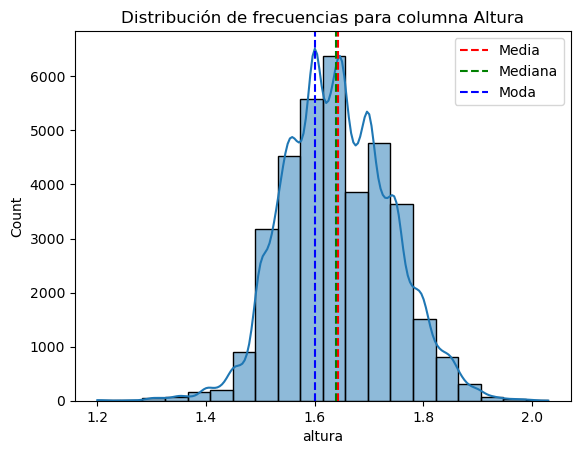

In [17]:
fig = sns.histplot(df, x="altura", kde=True, bins=20)
fig.axvline(datos_numericos.loc["altura"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["altura"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["altura"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Altura")
fig.legend()

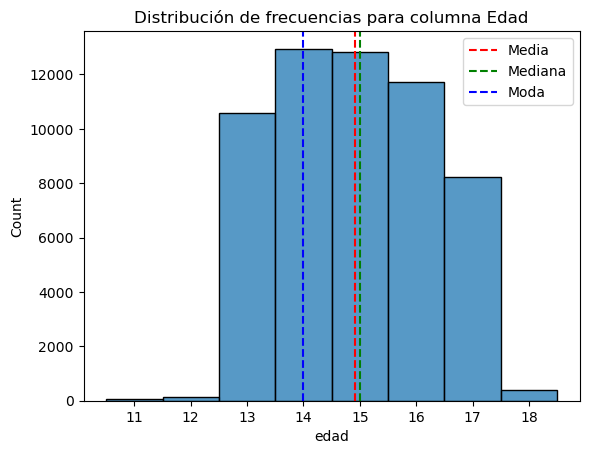

In [18]:
fig = sns.histplot(df, x="edad", discrete=True)
fig.axvline(datos_numericos.loc["edad"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["edad"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["edad"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Edad")
fig.legend()

**_Para los dos casos, rellenamos nulos con el valor de la mediana_**

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df.altura = imputer.fit_transform(df[['altura']])
df.edad = imputer.fit_transform(df[['edad']])
df[["altura","edad"]].describe()

,altura,edad
count,56981.000000,56981.000000
mean,1.641807,14.905583
std,0.077087,1.356834
min,1.200000,11.000000
25%,1.610000,14.000000
50%,1.640000,15.000000
75%,1.670000,16.000000
max,2.030000,18.000000


- Analizamos la dispersión y outliers para el caso de la columna `peso`. Ya que al tener una desviación estándar alta, los datos se asume que están dispersos. Con una media, moda y mediana cercanos pero con un sesgo a la derecha ya que la media (60.21) es mayor a la mediana (58)

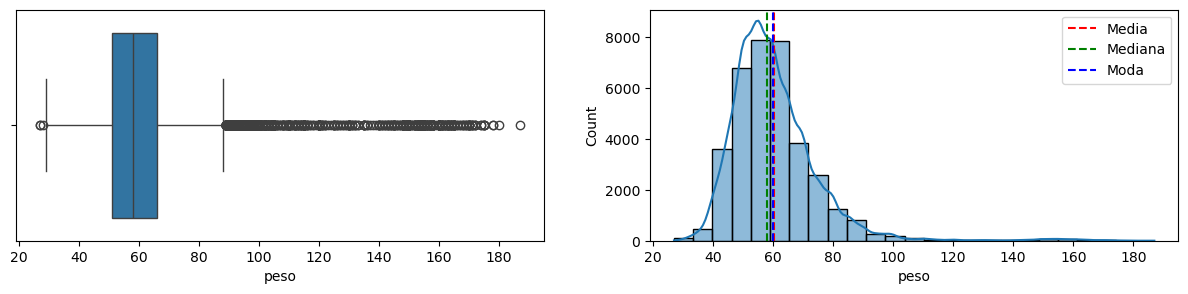

In [20]:
#Grafico de bigotes e histograma para evaluar la dispersión
f, (ax_box, ax_hist) = plt.subplots(1,2, figsize=(15, 3), sharex=False, sharey=False)

sns.boxplot(data=df, x="peso", ax=ax_box)

sns.histplot(data=df, x="peso", ax=ax_hist, bins=25, kde=True)

ax_hist.axvline(datos_numericos.loc["peso"].media, color='r', linestyle='--', label="Media")
ax_hist.axvline(datos_numericos.loc["peso"].mediana, color='g', linestyle='--', label="Mediana")
ax_hist.axvline(datos_numericos.loc["peso"].moda, color='b', linestyle='--', label="Moda")
ax_hist.legend()


plt.show()

Filas no nulas df original: 36052
Filas no nulas sin outliers: 34878
Filas removidas: 1174
Medidas estadísticas originales
count    36052.000000
mean        60.212193
std         14.723909
min         27.000000
25%         51.000000
50%         58.000000
75%         66.000000
max        187.000000
Name: peso, dtype: float64
Medidas estadísticas sin outliers
count    34878.000000
mean        58.526722
std         10.712567
min         29.000000
25%         50.000000
50%         57.000000
75%         65.000000
max         88.000000
Name: peso, dtype: float64


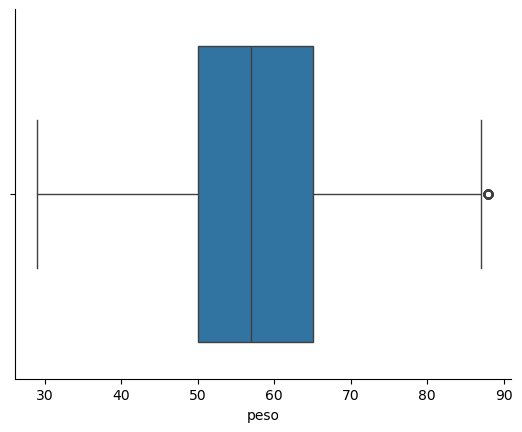

In [21]:
#Analizamos cuantos son los outliers y como cambia la descripción estadística de la columna sin ellos
q1, q3 = df["peso"].quantile([.25, .75])
ric = q3 - q1 #rango inter quartil
l_inf = q1 - 1.5 * ric
l_sup = q3 + 1.5 * ric
df_sin_outliers = df[df["peso"].between(l_inf, l_sup)]
print(f"Filas no nulas df original: {df.peso.count()}")
print(f"Filas no nulas sin outliers: {df_sin_outliers.peso.count()}")
print(f"Filas removidas: {df.peso.count() - df_sin_outliers.peso.count()}")
print("Medidas estadísticas originales")
print(df.peso.describe().T)
print("Medidas estadísticas sin outliers")
print(df_sin_outliers.peso.describe().T)
sns.boxplot(data=df_sin_outliers, x="peso")
sns.despine()

> Como el porcentaje de datos removidos es chico (2% --> 1174 filas en 56981 del total de filas), removemos los outliers y rellenamos nulos con la media

In [22]:
df = df_sin_outliers
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df.peso = imputer.fit_transform(df[['peso']])
df[["peso"]].describe()

,peso
count,34878.000000
mean,58.526722
std,10.712567
min,29.000000
25%,50.000000
50%,57.000000
75%,65.000000
max,88.000000


- Como `obeso`, `bajo_peso` y `sobre_peso` están calculados a partir de una fórmula que desconocemos y tienen alto porcentaje en datos nulos eliminaremos esas columnas.

In [23]:
df.drop(columns=["obeso", "bajo_peso","sobre_peso"], inplace=True)
df.columns

Index(['edad', 'sexo', 'grado', 'altura', 'peso', 'hambre', 'participar_pelea',
       'cantidad_lesiones', 'tipo_lesion', 'causa_lesion', 'sentir_soledad',
       'sentir_preocupacion', 'pensar_suicidio', 'intentar_suicidio',
       'amigos_cercanos', 'edad_cigarrillo', 'dias_fumar', 'padres_fuman',
       'edad_alcohol', 'dias_tomar_alcohol', 'problemas_alcohol',
       'edad_drogas', 'relaciones_sexuales', 'edad_relaciones_sexuales',
       'dias_act_fisica', 'dias_clase_ef', 'dias_falta_clases',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'intimidacion_escuela', 'intimidacion_fuera',
       'intimidacion_internet', 'amigos_alcohol', 'sentir_ridiculo',
       'padres_expectativas_altas'],
      dtype='object')

In [24]:
#Volvemos a analizar nulos con los cambios hechos hasta ahora
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
cantidad_lesiones,3245,9.30,object
causa_lesion,3152,9.04,object
tipo_lesion,2522,7.23,object
edad_alcohol,1961,5.62,object
relaciones_sexuales,1553,4.45,object
edad_drogas,1530,4.39,object
edad_relaciones_sexuales,1497,4.29,object
padres_expectativas_altas,1195,3.43,object
dias_tomar_alcohol,1186,3.40,object
padres_atencion,1134,3.25,object


**_Todos los datos faltantes se corresponden con columnas categóricas. Utilizaremos un método de relleno basado en el siguiente valor para las columnas con un porcentaje mayor de datos faltantes y el resto rellenaremos con el `más frecuente`_**

In [25]:
df.cantidad_lesiones.ffill(inplace=True)
df.causa_lesion.ffill(inplace=True)
df.tipo_lesion.ffill(inplace=True)
df[["cantidad_lesiones","causa_lesion","tipo_lesion"]].isnull().sum()

cantidad_lesiones    0
causa_lesion         0
tipo_lesion          0
dtype: int64

In [26]:
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
edad_alcohol,1961,5.62,object
relaciones_sexuales,1553,4.45,object
edad_drogas,1530,4.39,object
edad_relaciones_sexuales,1497,4.29,object
padres_expectativas_altas,1195,3.43,object
dias_tomar_alcohol,1186,3.40,object
padres_atencion,1134,3.25,object
sentir_ridiculo,1126,3.23,object
dias_clase_ef,956,2.74,object
padres_revisar,949,2.72,object


In [27]:
#Llenamos los nulos con la opción más frecuente.
imputer_frequent = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [28]:
for columna in df_info_nulos[df_info_nulos["Porcentaje"] > 0].index:
    datos_imputados = imputer_frequent.fit_transform(df[[columna]])
    df[columna] =  datos_imputados[:,0]


In [29]:
#Chequeamos que no queden nulos
df.isnull().sum()

edad                         0
sexo                         0
grado                        0
altura                       0
peso                         0
hambre                       0
participar_pelea             0
cantidad_lesiones            0
tipo_lesion                  0
causa_lesion                 0
sentir_soledad               0
sentir_preocupacion          0
pensar_suicidio              0
intentar_suicidio            0
amigos_cercanos              0
edad_cigarrillo              0
dias_fumar                   0
padres_fuman                 0
edad_alcohol                 0
dias_tomar_alcohol           0
problemas_alcohol            0
edad_drogas                  0
relaciones_sexuales          0
edad_relaciones_sexuales     0
dias_act_fisica              0
dias_clase_ef                0
dias_falta_clases            0
otros_amables                0
padres_tarea                 0
padres_atencion              0
padres_tiempo_libre          0
padres_revisar               0
padre_ed

In [30]:
#Guardamos nuevo csv con el DataFrame sin datos nulos
df.to_csv("EMSE_DatosAnalisisBullying.csv", index=False)

## Transformación de datos categóricos

_Como primera medida transformaremos las columnas que solo tengan los valores "Si" y "No" por 1 y 0 respectivamente_

In [31]:
#Buscamos las columnas que tengan esos valores
columnas_booleanas = df.columns[df.isin(["No", "Si"]).all()].tolist()

In [32]:
#Reemplazamos los valores por su correspondiente numérico
df[columnas_booleanas] = df[columnas_booleanas].replace({"No":0, "Si":1})
print(df[columnas_booleanas].dtypes)
np.unique(df[columnas_booleanas].values)

pensar_suicidio          int64
relaciones_sexuales      int64
intimidacion_escuela     int64
intimidacion_fuera       int64
intimidacion_internet    int64
dtype: object


array([0, 1])

_Analizamos ahora las otras columnas de tipo object_

In [33]:
#Vemos nombres de las columnas de tipo object
columnas_categoricas = df.select_dtypes(object).columns
columnas_categoricas

Index(['sexo', 'grado', 'hambre', 'participar_pelea', 'cantidad_lesiones',
       'tipo_lesion', 'causa_lesion', 'sentir_soledad', 'sentir_preocupacion',
       'intentar_suicidio', 'amigos_cercanos', 'edad_cigarrillo', 'dias_fumar',
       'padres_fuman', 'edad_alcohol', 'dias_tomar_alcohol',
       'problemas_alcohol', 'edad_drogas', 'edad_relaciones_sexuales',
       'dias_act_fisica', 'dias_clase_ef', 'dias_falta_clases',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'amigos_alcohol', 'sentir_ridiculo',
       'padres_expectativas_altas'],
      dtype='object')

In [34]:
#Analizamos valores que toman cada una de esas columnas
for col in columnas_categoricas:
    print(f'{col}: {df[col].unique()}')

sexo: ['Masculino' 'Femenino']
grado: ['2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 '9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
hambre: ['Nunca' 'Algunas veces' 'Rara vez' 'Siempre' 'Casi siempre']
participar_pelea: ['Ninguna' '2 o 3 veces' '1 vez' '4 o 5 veces' '6 o 7 veces' '8 o 9 veces'
 '12 o más veces' '10 u 11 veces']
cantidad_lesiones: ['2 o 3 veces' 'Ninguna' '1 vez' '10 u 11 veces' '4 o 5 veces'
 '6 o 7 veces' '12 o más veces' '8 o 9 veces']
tipo_lesion: ['Tuve un hueso roto o una articulación dislocada'
 'No tuve ninguna lesión seria o grave en los últimos 12 meses'
 'Me sucedió otra cosa'
 'Sufrí un golpe u otra lesión en la cabeza o el cuello, me desmayé o no podía respirar'
 'Recibí un corte, una punzada o puñalada' 'Sufrí una quemadura gra

### Notamos que hay diferentes casos a analizar:
#### 1- Columnas con valores ['Algunas veces' 'Casi siempre' 'Rara vez' 'Siempre' 'Nunca'] 
- En este caso las categorias se corresponden con un nivel, por lo que se reemplazará por valores crecientes en orden desde `Nunca` a `Siempre`
#### 2- Columnas con catidades:
_Columnas como aquellas que empiezan por `dias_*`, `edad_*` y algunas otras como `participar_pelea`, `amigos_cercanos`, etc que su respuesta es un numero y el texto "veces" o "días", etc._
- En este caso reemplazaremos por el valor del primer entero que se detecte y `ninguno`, `nunca`, etc serán `0`
#### 3- Columnas con categorías
_Son columnas que tienen diferentes valores que no representan una escala o número en específico_
- Para estos casos se usará `LabelEncoder` o `get_dummies` según veamos conveniente

In [35]:
### Columnas caso 1
columnas_caso_1 = df.columns[df.isin(['Nunca','Algunas veces','Rara vez','Siempre','Casi siempre']).all()].tolist()
columnas_caso_1

['hambre',
 'sentir_soledad',
 'sentir_preocupacion',
 'otros_amables',
 'padres_tarea',
 'padres_atencion',
 'padres_tiempo_libre',
 'padres_revisar',
 'sentir_ridiculo',
 'padres_expectativas_altas']

In [36]:
valores = {
    'Nunca': 0
    ,'Rara vez': 1
    ,'Algunas veces': 2
    ,'Casi siempre': 3
    ,'Siempre': 4
}
nuevas_columnas = [col + '_val' for col in columnas_caso_1]
df[nuevas_columnas] = df[columnas_caso_1].replace(valores)
df[nuevas_columnas + columnas_caso_1]

,hambre_val,sentir_soledad_val,sentir_preocupacion_val,otros_amables_val,padres_tarea_val,padres_atencion_val,padres_tiempo_libre_val,padres_revisar_val,sentir_ridiculo_val,padres_expectativas_altas_val,hambre,sentir_soledad,sentir_preocupacion,otros_amables,padres_tarea,padres_atencion,padres_tiempo_libre,padres_revisar,sentir_ridiculo,padres_expectativas_altas
2,0,0,1,2,4,4,4,0,0,4,Nunca,Nunca,Rara vez,Algunas veces,Siempre,Siempre,Siempre,Nunca,Nunca,Siempre
3,0,0,2,2,0,4,4,0,0,4,Nunca,Nunca,Algunas veces,Algunas veces,Nunca,Siempre,Siempre,Nunca,Nunca,Siempre
5,0,0,1,3,4,4,4,0,1,4,Nunca,Nunca,Rara vez,Casi siempre,Siempre,Siempre,Siempre,Nunca,Rara vez,Siempre
10,0,0,3,3,4,4,0,2,0,2,Nunca,Nunca,Casi siempre,Casi siempre,Siempre,Siempre,Nunca,Algunas veces,Nunca,Algunas veces
13,0,1,1,3,2,4,0,1,1,1,Nunca,Rara vez,Rara vez,Casi siempre,Algunas veces,Siempre,Nunca,Rara vez,Rara vez,Rara vez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,0,1,1,1,2,3,3,0,1,0,Nunca,Rara vez,Rara vez,Rara vez,Algunas veces,Casi siempre,Casi siempre,Nunca,Rara vez,Nunca
56974,3,0,0,2,4,4,2,1,0,4,Casi siempre,Nunca,Nunca,Algunas veces,Siempre,Siempre,Algunas veces,Rara vez,Nunca,Siempre
56975,0,1,1,3,1,2,0,3,2,3,Nunca,Rara vez,Rara vez,Casi siempre,Rara vez,Algunas veces,Nunca,Casi siempre,Algunas veces,Casi siempre
56976,3,2,3,2,3,2,2,1,3,1,Casi siempre,Algunas veces,Casi siempre,Algunas veces,Casi siempre,Algunas veces,Algunas veces,Rara vez,Casi siempre,Rara vez


In [37]:
### Columnas caso 2
# Seleccionamos las columnas que comiencen con dias, edad o cantidad
columnas_cantidad = [col for col in df.columns if col.startswith(("dias_","edad_", "cantidad_"))]
# Agregamos otras columnas que también tienen valores
columnas_cantidad.extend(["participar_pelea", "intentar_suicidio", "amigos_cercanos","problemas_alcohol"])
# Vemos todos los valores
np.unique(df[columnas_cantidad].values)

array(['0', '0 días', '0 veces', '1', '1 día', '1 o 2 días',
       '1 o 2 veces', '1 vez', '10 a 19 días', '10 días o más',
       '10 o 11 años', '10 o más veces', '10 u 11 años', '10 u 11 veces',
       '11 años o menos', '12 años', '12 o 13 años', '12 o más veces',
       '13 años', '14 años', '14 o 15 años', '15 años', '16 o 17 años',
       '18 años o más', '2', '2 días', '2 o 3 veces', '20 a 29 días',
       '3 a 5 días', '3 a 9 veces', '3 días', '3 o más', '4 días',
       '4 o 5 veces', '5 días', '5 días o más', '6 a 9 días', '6 días',
       '6 o 7 veces', '6 o más veces', '7 años de edad o menos',
       '7 años o menos', '7 días', '8 o 9 años', '8 o 9 veces',
       'Los 30 días', 'Ninguna', 'Nunca probé cigarrillos',
       'Nunca tomé alcohol más que unos pocos sorbos',
       'Nunca tuve relaciones sexuales', 'Nunca usé Drogas'], dtype=object)

In [39]:
# Reemplazamos todos los valores que tengan Nunca por 0.
df[columnas_cantidad] = df[columnas_cantidad].replace(r'(^Nunca.*$)', 0, regex=True) #  Expresión regular "empieza por Nunca"
# Reemplazamos Ninguna por 0 y "Los 30 días" por 30
df[columnas_cantidad] = df[columnas_cantidad].replace({"Ninguna": 0, "Los 30 días": 30})
# Reemplazamos ahora los valores por el primer caracter
for col in columnas_cantidad:
    df[col] = df[col].astype(str).apply(lambda x: x.split()[0])
np.unique(df[columnas_cantidad].values)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '18', '2',
       '20', '3', '30', '4', '5', '6', '7', '8'], dtype=object)

In [40]:
#Convertimos a entero
df[columnas_cantidad] = df[columnas_cantidad].astype(int)
df.dtypes

edad                             float64
sexo                              object
grado                             object
altura                           float64
peso                             float64
hambre                            object
participar_pelea                   int64
cantidad_lesiones                  int64
tipo_lesion                       object
causa_lesion                      object
sentir_soledad                    object
sentir_preocupacion               object
pensar_suicidio                    int64
intentar_suicidio                  int64
amigos_cercanos                    int64
edad_cigarrillo                    int64
dias_fumar                         int64
padres_fuman                      object
edad_alcohol                       int64
dias_tomar_alcohol                 int64
problemas_alcohol                  int64
edad_drogas                        int64
relaciones_sexuales                int64
edad_relaciones_sexuales           int64
dias_act_fisica 

In [54]:
### Columnas caso 3
# Valores de todas las columnas categoricas menos las del caso 1 (que tienen nueva columna numerica)
columnas_categoricas = df.select_dtypes(object).columns
columnas_categoricas = [col for col in columnas_categoricas if col not in columnas_caso_1]
columnas_categoricas

['sexo',
 'grado',
 'tipo_lesion',
 'causa_lesion',
 'padres_fuman',
 'padre_educacion',
 'madre_educacion',
 'amigos_alcohol']

In [55]:
#Analizamos valores que toman cada una de esas columnas
for col in columnas_categoricas:
    print(f'{col}: {df[col].unique()}')

sexo: ['Masculino' 'Femenino']
grado: ['2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 '9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
tipo_lesion: ['Tuve un hueso roto o una articulación dislocada'
 'No tuve ninguna lesión seria o grave en los últimos 12 meses'
 'Me sucedió otra cosa'
 'Sufrí un golpe u otra lesión en la cabeza o el cuello, me desmayé o no podía respirar'
 'Recibí un corte, una punzada o puñalada' 'Sufrí una quemadura grave'
 'Recibí una herida con arma de fuego'
 'Perdí todo o parte de un pie, pierna, mano o brazo']
causa_lesion: ['Otra cosa causó mi lesión' 'Me caí'
 'No sufrí ninguna lesión seria o grave durante los últimos 12 meses'
 'Algo me cayó encima o me golpeó'
 'Fui atacado, agredido, abusado o estaba peleando con alguien'
 'Tuve u

Para la columna `sexo` usaremos get_dummies, ya que al ser solo dos categorias que van a ser muy utilizadas nos parece la mejor opción

In [56]:
df = pd.get_dummies(df, columns=["sexo"])
df.head()

,edad,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,sentir_soledad,...,sentir_preocupacion_val,otros_amables_val,padres_tarea_val,padres_atencion_val,padres_tiempo_libre_val,padres_revisar_val,sentir_ridiculo_val,padres_expectativas_altas_val,sexo_Femenino,sexo_Masculino
2,14.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,0,2,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,Nunca,...,1,2,4,4,4,0,0,4,False,True
3,16.0,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2,0,No tuve ninguna lesión seria o grave en los úl...,Otra cosa causó mi lesión,Nunca,...,2,2,0,4,4,0,0,4,False,True
5,13.0,9no grado nivel Primario/Polimodal o 2do año n...,1.72,48.0,Nunca,1,1,Tuve un hueso roto o una articulación dislocada,Me caí,Nunca,...,1,3,4,4,4,0,1,4,False,True
10,15.0,9no grado nivel Primario/Polimodal o 2do año n...,1.64,45.0,Nunca,1,1,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,Nunca,...,3,3,4,4,0,2,0,2,False,True
13,14.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.50,40.0,Nunca,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,Rara vez,...,1,3,2,4,0,1,1,1,True,False


Para el resto de columnas usaremos `LabelEncoder`

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
#Quitar la columna "sexo" de las columnas que nos quedan por tratar
columnas_categoricas.remove("sexo")

In [63]:
for col in columnas_categoricas:
    df[col+"_val"] = encoder.fit_transform(df[col])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34878 entries, 2 to 56980
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edad                           34878 non-null  float64
 1   grado                          34878 non-null  object 
 2   altura                         34878 non-null  float64
 3   peso                           34878 non-null  float64
 4   hambre                         34878 non-null  object 
 5   participar_pelea               34878 non-null  int64  
 6   cantidad_lesiones              34878 non-null  int64  
 7   tipo_lesion                    34878 non-null  object 
 8   causa_lesion                   34878 non-null  object 
 9   sentir_soledad                 34878 non-null  object 
 10  sentir_preocupacion            34878 non-null  object 
 11  pensar_suicidio                34878 non-null  int64  
 12  intentar_suicidio              34878 non-null  int6

## Gráficos

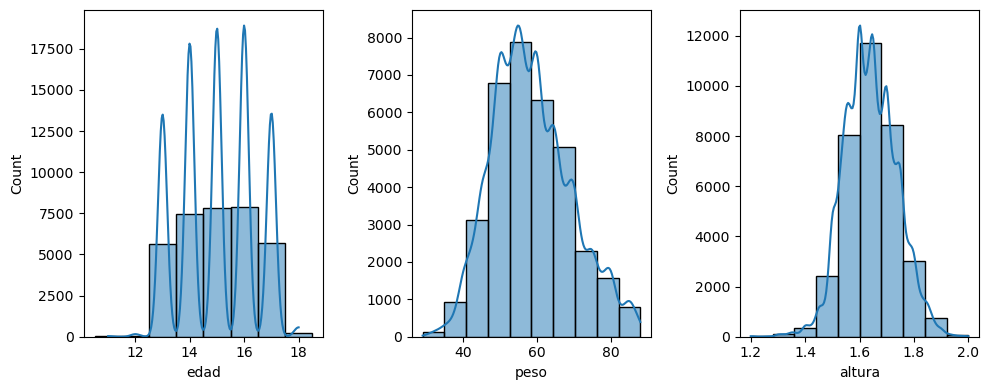

In [386]:
#Gráfico de densidad de las columnas numéricas
fig, ax = plt.subplots(1,3, figsize=(10, 4))
sns.histplot(df.edad,discrete=True, kde=True, ax=ax[0])
sns.histplot(df.peso, bins = 10,kde=True, ax=ax[1])
sns.histplot(df.altura, bins = 10,kde=True, ax=ax[2])
fig.tight_layout()

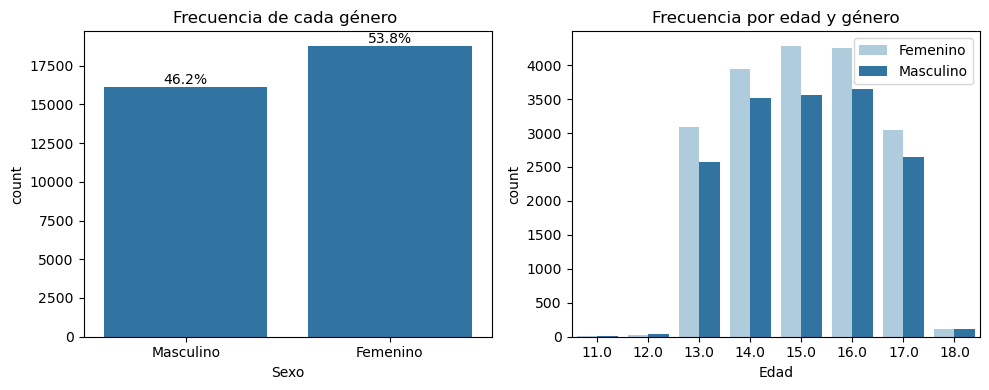

In [285]:
#Frecuencia por edad y sexo
fig, axes = plt.subplots(1,2, figsize=(10, 4))

# Trazar el primer gráfico en el primer eje
total = df['sexo'].count()
sns.countplot(data=df, x="sexo", ax=axes[0])
axes[0].bar_label(axes[0].containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
axes[0].set_xlabel('Sexo')
axes[0].set_title('Frecuencia de cada género ')

# Trazar el segundo gráfico en el segundo eje
sns.countplot(data=df, x="edad", hue="sexo", palette="Paired",  ax=axes[1])
axes[1].set_xlabel('Edad')
axes[1].set_title('Frecuencia por edad y género')
axes[1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()


> Se aprecia que la distribución por sexo en cada edad se mantiene, siendo ligeramente mayor la proporción de feminino que de masculino

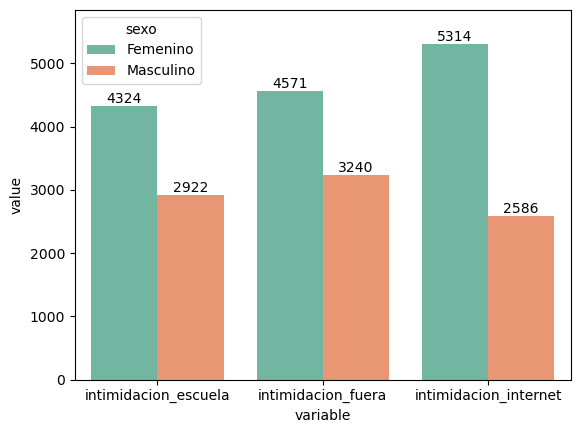

In [310]:
#Intimidación por tipo y sexo
df_intimidacion = df[["sexo","intimidacion_escuela","intimidacion_fuera","intimidacion_internet"]].groupby(["sexo",]).sum().reset_index()
ax = sns.barplot(data=df_intimidacion.melt(id_vars=['sexo']), x="variable", y="value", hue="sexo", palette="Set2")
for container in ax.containers:
    ax.bar_label(container)
    ax.margins(y=0.1)


> Se aprecia que para la categoría `intimidación por internet` se detecta tanto el **mayor** número de casos para el sexo `femenino` como el **menor** para `masculino`

,sexo,intimidacion_escuela,intimidacion_fuera,intimidacion_internet
0,Femenino,4324,4571,5314
1,Masculino,2922,3240,2586


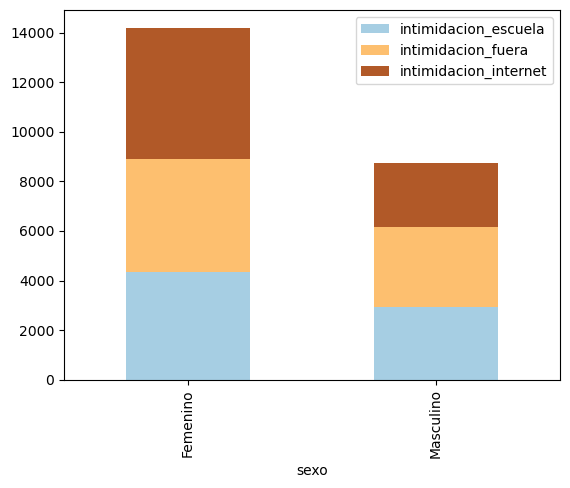

In [318]:
df_intimidacion.set_index("sexo").plot(kind="bar", stacked=True, colormap='Paired')

> Otra manera de ver la diferencia entre casos para cada sexo. Se puede ver como son más los casos de intimidación en niñas. También vemos que en niñas `internet` es la forma de intimidación más usada y en niños la distribución es más pareja, pero la mayor es `fuera del ámbito escolar`

In [323]:
# Vamos a calcular cuantas niñas y niños tuvieron algún tipo de intimidación.
# Para eso generamos una condición donde alguno de los tipos de intimidación sea 1
condicion = ((df["intimidacion_escuela"] == 1) | (df["intimidacion_fuera"] == 1) | (df["intimidacion_internet"] == 1))
df["intimidacion"] = np.where(condicion, 1, 0)
df[["sexo","edad","intimidacion","intimidacion_escuela","intimidacion_fuera","intimidacion_internet"]]

,sexo,edad,intimidacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet
2,Masculino,14.0,0,0,0,0
3,Masculino,16.0,0,0,0,0
5,Masculino,13.0,0,0,0,0
10,Masculino,15.0,0,0,0,0
13,Femenino,14.0,0,0,0,0
...,...,...,...,...,...,...
56972,Masculino,16.0,1,0,1,0
56974,Masculino,16.0,0,0,0,0
56975,Masculino,15.0,1,0,0,1
56976,Masculino,16.0,1,0,1,0


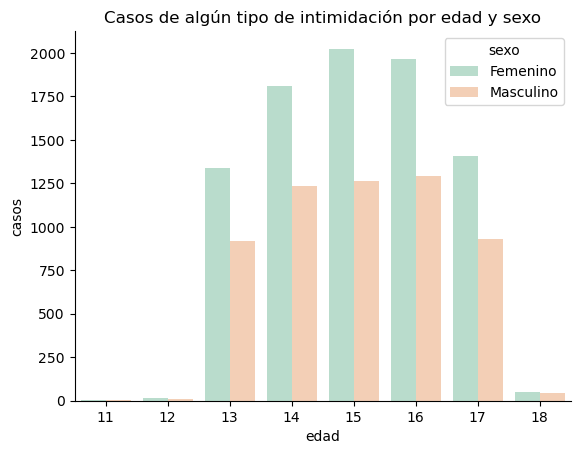

In [375]:
df_casos = df.groupby(["sexo","edad"])['intimidacion'].agg(casos='sum', total='count').reset_index()
df_casos["edad"] = df_casos["edad"].astype(int)
sns.barplot(data=df_casos, x="edad", y="casos", hue="sexo", palette="Pastel2")
plt.title("Casos de algún tipo de intimidación por edad y sexo")
sns.despine()

,sexo,casos,total,porcentaje
0,Femenino,8615,18772,45.89
1,Masculino,5695,16106,35.36


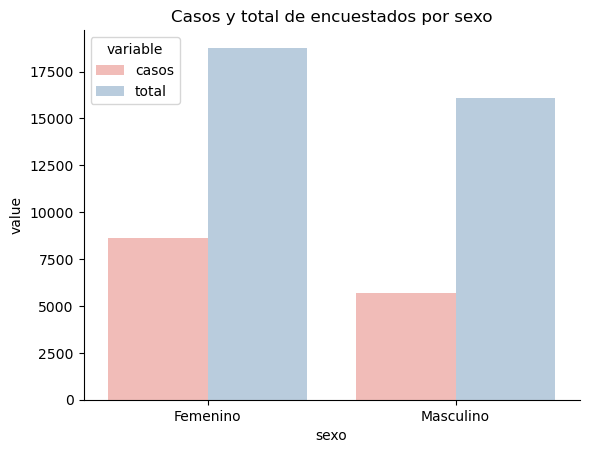

In [379]:
df_casos_sexo = df_casos[["sexo","casos","total"]].groupby("sexo").sum().reset_index()
ax = sns.barplot(data=df_casos_sexo.melt(id_vars=["sexo"]), x='sexo', y='value', hue='variable', palette="Pastel1")
plt.title("Casos y total de encuestados por sexo")
sns.despine()
df_casos_sexo["porcentaje"] = round(df_casos_sexo["casos"]/df_casos_sexo["total"]*100,2)
df_casos_sexo

> Aquí podemos apreciar que 45,89% del total `femenino` de los encuestados tuvo algún tipo de intimidación mientras del total `masculino`, solo el 35,36%

In [387]:
#Ahora cruzamos los casos de alguna intimidacion con sentirse solo
#Vemos los valores de "sentir_soledad"
df.sentir_soledad.unique()

array(['Nunca', 'Rara vez', 'Casi siempre', 'Siempre', 'Algunas veces'],
      dtype=object)

In [389]:
#Agrupamos 'Nunca' y 'Rara vez' como No y el resto como Si
condicion_soledad = (df["sentir_soledad"].isin(['Nunca', 'Rara vez']))
df["soledad"] = np.where(condicion_soledad, 'No','Si')
df[["intimidacion","sentir_soledad","soledad"]].sample(15)

,intimidacion,sentir_soledad,soledad
9902,1,Nunca,No
28474,1,Nunca,No
30828,1,Algunas veces,Si
40623,0,Nunca,No
12072,0,Rara vez,No
44814,1,Casi siempre,Si
10173,0,Algunas veces,Si
7548,1,Algunas veces,Si
22155,0,Rara vez,No
25813,1,Rara vez,No


soledad          No    Si
intimidacion             
No            13756  6812
Si             6136  8174


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Si')])

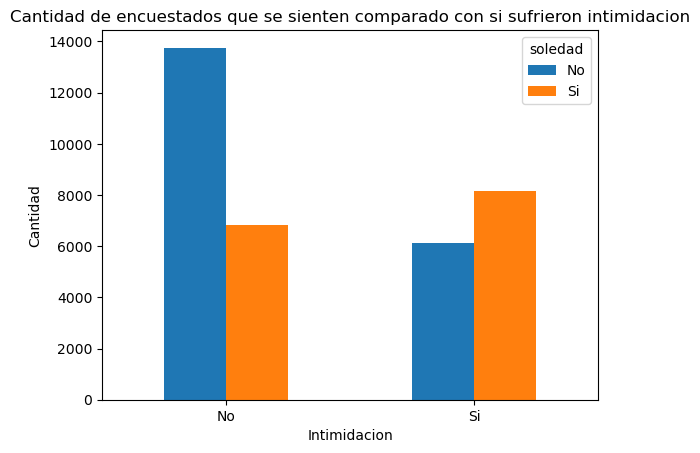

In [404]:
cross_tab = pd.crosstab(df['intimidacion'].replace({1:"Si",0:"No"}), df['soledad'])
print(cross_tab)

fig = cross_tab.plot(kind='bar')
fig.set_xlabel('Intimidacion')
fig.set_ylabel('Cantidad')
plt.title("Cantidad de encuestados que se sienten comparado con si sufrieron intimidacion")
plt.xticks(rotation=0)

> Comprobamos que en la mayoría de los casos en que no fueron intimidados tampoco se sienten solos, mientras que para los que si fueron intimidados se sienten solos.

  soledad               variable  value
0      No   intimidacion_escuela   2919
1      No     intimidacion_fuera   3174
2      No  intimidacion_internet   3076
3      Si   intimidacion_escuela   4327
4      Si     intimidacion_fuera   4637
5      Si  intimidacion_internet   4824


Text(0.5, 1.0, 'Cantidad de encuestados que se sienten solos por tipo intimidacion')

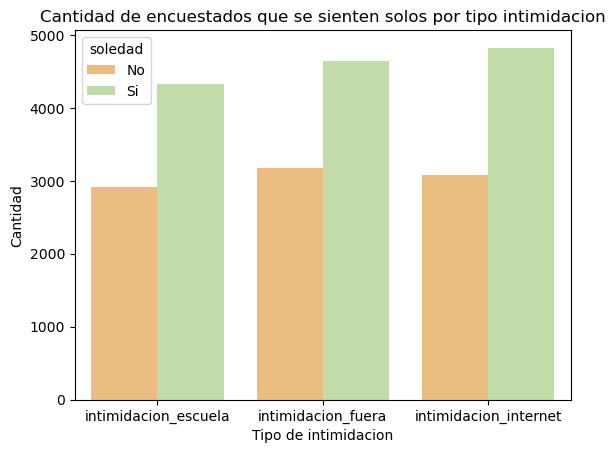

In [437]:
cross_intimidaciones = df[['intimidacion_escuela', 'intimidacion_fuera', 'intimidacion_internet','soledad']].melt(id_vars=['soledad']).groupby(['soledad','variable']).sum().reset_index()
print(cross_intimidaciones)

fig = sns.barplot(data=cross_intimidaciones, y='value', x='variable', hue='soledad', palette="Spectral")
fig.set_xlabel('Tipo de intimidacion')
fig.set_ylabel('Cantidad')
plt.title("Cantidad de encuestados que se sienten solos por tipo intimidacion")


> Aquí vemos que en todos los casos de intimidación son más los que se sienten solos que los que no.

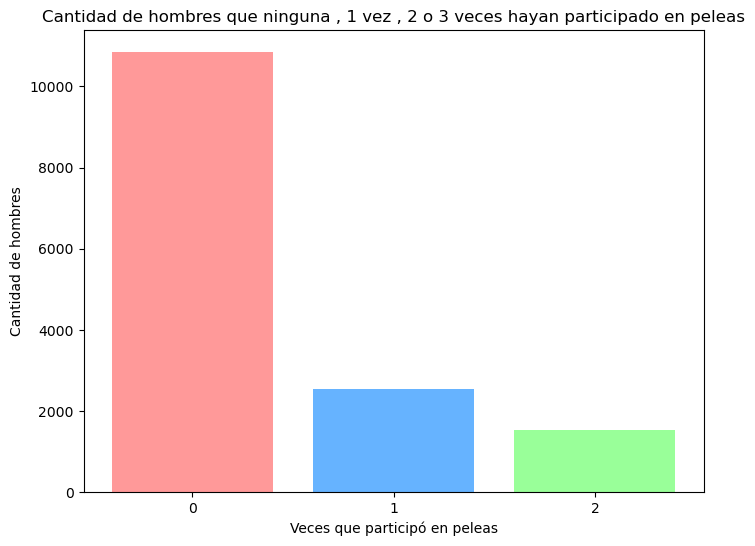

participar_pelea
0    10844
1     2538
2     1528
Name: count, dtype: int64

In [83]:
# Algunos otros datos interesantes analizados : 
# Cantidad de masculinos  que participaron en peleas
# Filtramos  los datos para obtener solo los  masculinos
df_masculino = df[df['sexo_Masculino'] == True]

# Contamos  la cantidad de hombres  que hayan o no participado en peleas 
conteo_lesiones_masculino = df_masculino['participar_pelea'].value_counts().reindex([0, 1, 2], fill_value=0)

# Creamos un  gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_lesiones_masculino.index.astype(str), conteo_lesiones_masculino.values, color=['#ff9999','#66b3ff','#99ff99'])

# Añadimos los  títulos  y etiquetas
plt.title('Cantidad de hombres que ninguna , 1 vez , 2 o 3 veces hayan participado en peleas')
plt.xlabel('Veces que participó en peleas')
plt.ylabel('Cantidad de hombres')

plt.show()
conteo_lesiones_masculino

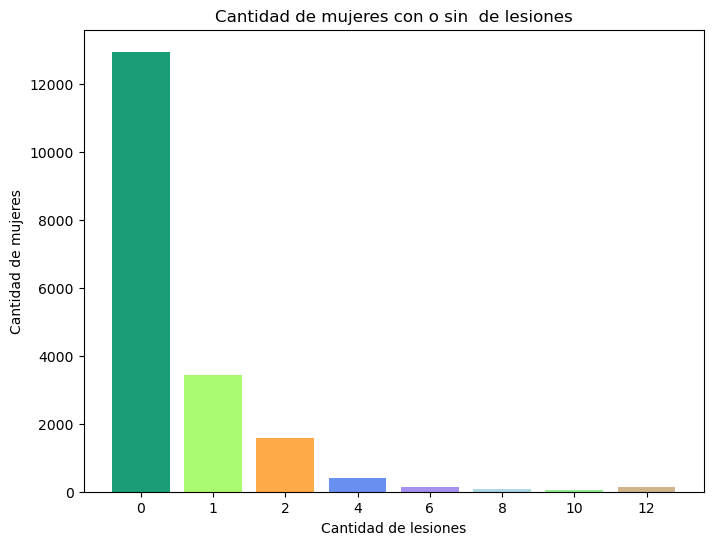

cantidad_lesiones
0     12959
1      3428
2      1592
4       413
6       132
8        74
10       39
12      135
Name: count, dtype: int64

In [95]:
# Cantidad de mujeres que fueron lesionadas
df_femenino = df[df['sexo_Femenino'] == True]

colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0', 'lightblue', 'lightgreen', 'tan']

# Contar la cantidad de mujeres en cada categoría de lesiones
conteo_lesiones_femenino = df_femenino['cantidad_lesiones'].value_counts().sort_index()

# Creamos un  gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_lesiones_femenino.index.astype(str), conteo_lesiones_femenino.values, color=colors)

# Añadimos los  títulos  y etiquetas
plt.title('Cantidad de mujeres con o sin  de lesiones')
plt.xlabel('Cantidad de lesiones')
plt.ylabel('Cantidad de mujeres')

plt.show()
conteo_lesiones_femenino

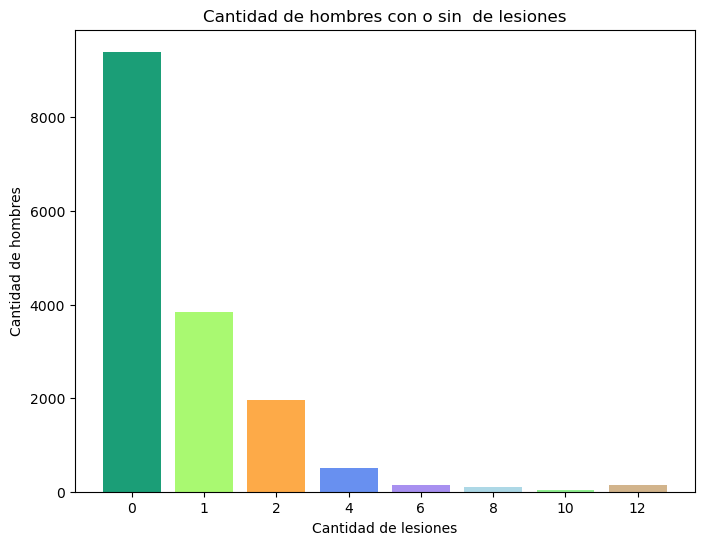

cantidad_lesiones
0     9403
1     3838
2     1950
4      504
6      136
8       91
10      36
12     148
Name: count, dtype: int64

In [96]:
# Cantidad de hombres que fueron lesionadas
df_masculino_lesionado = df[df['sexo_Masculino'] == True]

colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0', 'lightblue', 'lightgreen', 'tan']

# Contar la cantidad de mujeres en cada categoría de lesiones
conteo_lesiones_masculino = df_masculino_lesionado['cantidad_lesiones'].value_counts().sort_index()

# Creamos un  gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_lesiones_masculino.index.astype(str), conteo_lesiones_masculino.values, color=colors)

# Añadimos los  títulos  y etiquetas
plt.title('Cantidad de hombres con o sin  de lesiones')
plt.xlabel('Cantidad de lesiones')
plt.ylabel('Cantidad de hombres')

plt.show()
conteo_lesiones_masculino